[30000 29990 29980 ...  5280  5270  5260]


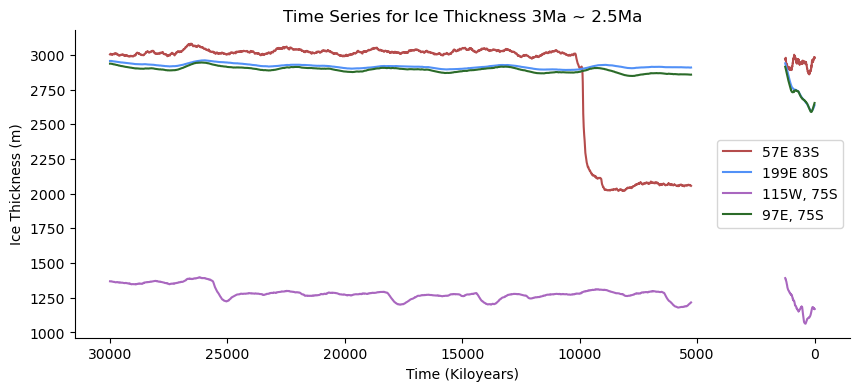

In [99]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy import interpolate

ice_time = np.arange(30000, 5250, -10)
print(ice_time)
latitudes = [57, 119, -115, 97]
latitudes2 = [57, 119, -115, 97]
ice_time2 = np.arange(1250, 0, -1)
longitudes = [-83, -80, -75, -75]
longitudes2 = [-83, -80, -75, -75]

gdf = '/Users/kyra/documents/Summer23/3shmergeh.nc'
ds = xr.open_dataset(gdf)
grid_points = ds.h.to_numpy()

gdf2 = '/Users/kyra/documents/Summer23/test.nc'
ds2 = xr.open_dataset(gdf2)
grid_points2 = ds2.h.to_numpy()

d = []
for i in range(4):
    d.append(grid_points[:, latitudes[i], longitudes[i]])

for i in range(4):
    d.append(grid_points2[:, latitudes2[i], longitudes2[i]])

plt.figure(figsize=(10, 4))
grouped_data = {}  # Dictionary to store the data grouped by coordinates
colors = ['#B54C4C', '#5291F7', '#A967BF', '#2B6B29']  # You can add more colors if needed

# Plot the first set of data
for i in range(4):
    lat, lon = latitudes[i], longitudes[i]
    key = (lat, lon)
    color = colors[i % len(colors)]
    plt.plot(ice_time, d[i], label=f'Lat: {lat}, Lon: {lon}', color=color)

# Plot the second set of data
for i in range(4, 8):
    lat, lon = latitudes2[i - 4], longitudes2[i - 4]
    key = (lat, lon)
    color = colors[i % len(colors)]
    plt.plot(ice_time2, d[i], label=f'Lat: {lat}, Lon: {lon}', color=color)

plt.legend()
plt.xlabel('Time (Kiloyears)')
plt.gca().invert_xaxis()
plt.ylabel('Ice Thickness (m)')

plt.title('Time Series for Ice Thickness 3Ma ~ 2.5Ma')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

legend_labels = ['57E 83S', '199E 80S', '115W, 75S',  '97E, 75S']

plt.legend(legend_labels, loc='best')
plt.show()